## Plot the generated daily soil and runoff cation concentrations

user_nl_elm specs: 
```
 hist_mfilt = 1, 1
 hist_nhtfrq = -96360, -24
 hist_dov2xy = .true., .true.
 hist_fincl2 = 'soil_pH', 'forc_app', 'forc_min', 'forc_pho', 'forc_gra', 'forc_sph',
            'primary_mineral_vr_1', 'cation_vr_1', 'cation_vr_2', 'cation_vr_3', 'cation_vr_4', 'cation_vr_5', 'silica_vr',
            'secondary_mineral_vr_1', 'armor_thickness_vr', 'ssa', 
            'primary_mineral', 'cation', 'silica', 'secondary_mineral', 
            'primary_added_vr_1', 'primary_dissolve_vr_1', 'primary_proton_flux_vr',
            'primary_h2o_flux_vr', 'primary_cation_flux_vr_1', 'r_dissolve_vr_1',
            'secondary_cation_flux_vr_1', 'secondary_mineral_flux_vr_1', 'r_precip_vr_1',
            'primary_prelease_vr', 'cation_leached_vr_1', 'cation_runoff_vr_1',
            'primary_added', 'primary_dissolve', 'primary_cation_flux',
            'secondary_cation_flux', 'secondary_mineral_flux', 'cation_leached',
            'cation_runoff', 'r_sequestration', 'background_weathering', 'background_weathering_vr_1'
```

In [1]:
import os
import xarray as xr
from glob import glob
import pandas as pd
import matplotlib.pyplot as plt

import numpy as np
from shared_read_HBR import *
from matplotlib import rcParams

rcParams['font.size'] = 14
rcParams['axes.titlesize'] = 14

folder = 'ERW_20240310_HBR_1_ICB20TRCNPRDCTCBC'
#folder = 'ERW_20231110_UC_Davis_ICB20TRCNPRDCTCBC'
#folder = 'ERW_UC_Davis_ICB1850CNRDCTCBC_ad_spinup'

In [2]:
path_to_files = os.path.join(os.environ['PROJDIR'], 'E3SM', 'output', folder, 'run')
if '1850' in folder:
    hr = xr.open_mfdataset(glob(os.path.join(path_to_files, '*.elm.h1.000*.nc')))
    tvec = [pd.Timestamp(year=t.year + 2000, month=t.month, day=t.day) for t in hr['time'].values]
else:
    hr = xr.open_mfdataset(glob(os.path.join(path_to_files, '*.elm.h1.*.nc')))
    tvec = [pd.Timestamp(year=t.year, month=t.month, day=t.day) for t in hr['time'].values]

## 1. Background weathering rates

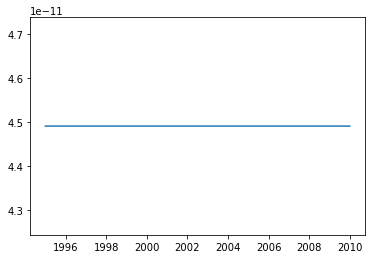

In [3]:
plt.plot(tvec, hr['background_weathering'][:, 0,0])

## 2. Cation concentration in soil pore water

(0.0, 1.0, 0.0, 1.0)

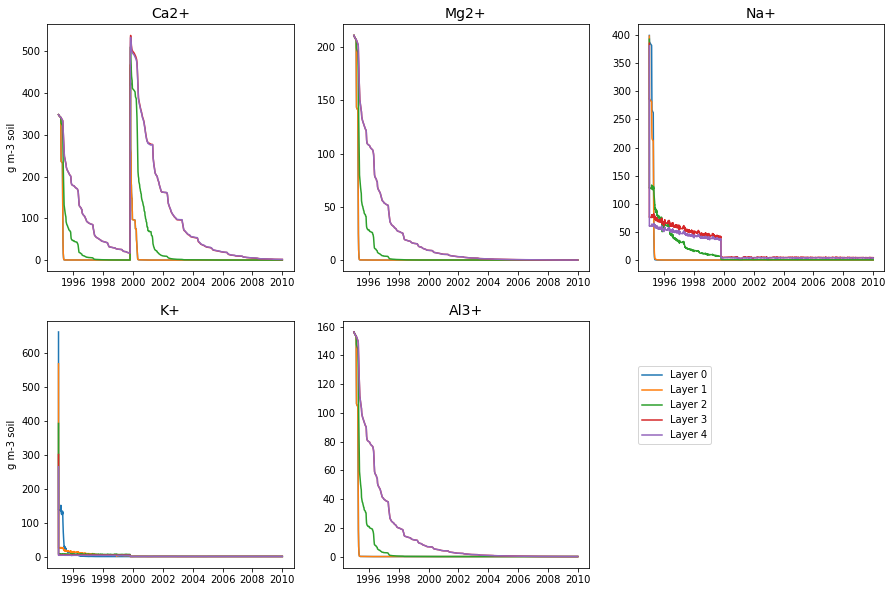

In [4]:
fig, axes = plt.subplots(2, 3, figsize = (15, 10))
for i, cation in enumerate(['Ca2+', 'Mg2+', 'Na+', 'K+', 'Al3+']):
    ax = axes.flat[i]
    for layer in range(5):
        ax.plot(tvec, hr[f'cation_vr_{i+1}'][:, layer, 0], label = f'Layer {layer}')
    if i == 4:
        ax.legend(loc = (1.2,0.5))
    ax.set_title(cation)
    if np.mod(i, 3) == 0:
        ax.set_ylabel('g m-3 soil')
axes.flat[-1].axis('off')

## 3. Cation loss by runoff and leaching

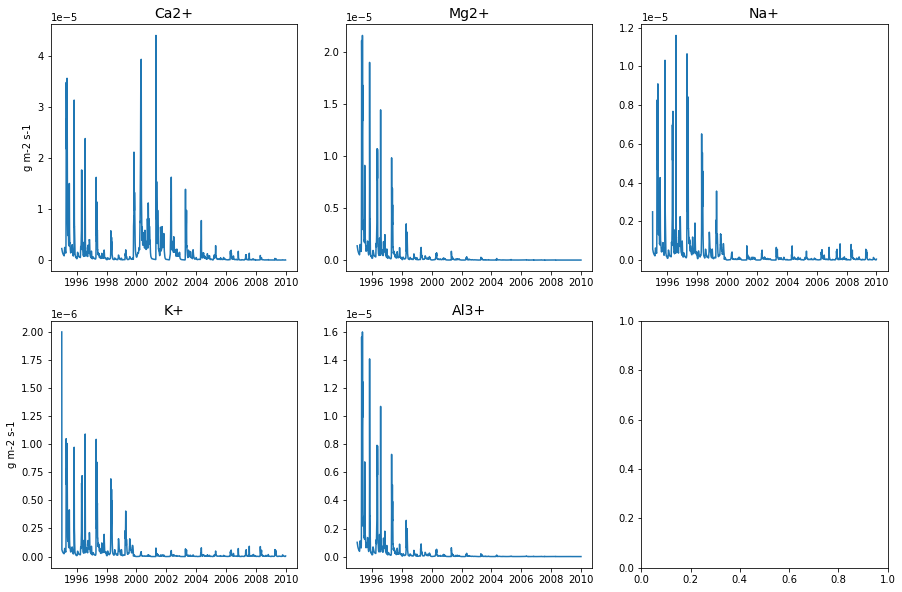

In [5]:
cation_export_sim = pd.DataFrame(
    hr['cation_leached'][:, :, 0] + hr['cation_runoff'][:, :, 0],
    index = tvec, columns = ['Ca2+','Mg2+','Na+','K+','Al3+'])

fig, axes = plt.subplots(2, 3, figsize = (15, 10))
for i, cation in enumerate(['Ca2+', 'Mg2+', 'Na+', 'K+', 'Al3+']):
    ax = axes.flat[i]
    ax.plot(tvec, cation_export_sim[cation])
    if np.mod(i, 3) == 0:
        ax.set_ylabel('g m-2 s-1')
    ax.set_title(cation)
    #ax.set_yscale('log')

(0.0, 1.0, 0.0, 1.0)

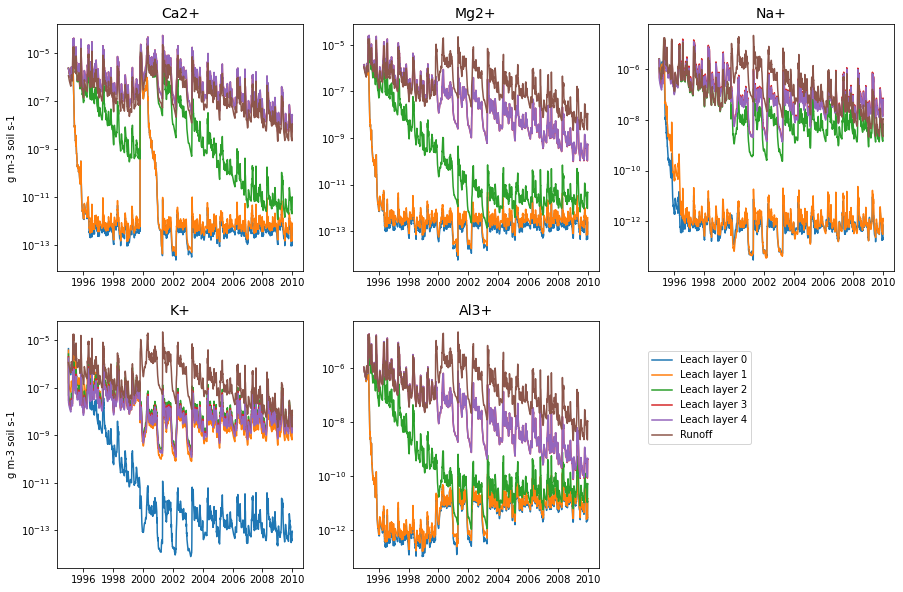

In [6]:
fig, axes = plt.subplots(2, 3, figsize = (15, 10))
for i, cation in enumerate(['Ca2+', 'Mg2+', 'Na+', 'K+', 'Al3+']):
    ax = axes.flat[i]
    for layer in range(5):
        ax.plot(tvec, hr[f'cation_leached_vr_{i+1}'][:, layer, 0], label = f'Leach layer {layer}')
    ax.plot(tvec, hr[f'cation_runoff'][:, 0], label = f'Runoff')
    if i == 4:
        ax.legend(loc = (1.2,0.5))
    ax.set_title(cation)
    if np.mod(i, 3) == 0:
        ax.set_ylabel('g m-3 soil s-1')
    ax.set_yscale('log')
axes.flat[-1].axis('off')

## 4. Rate of primary mineral dissolution

<ipython-input-7-321dd88e5ae3>:11: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  ax.set_yscale('log')


(0.0, 1.0, 0.0, 1.0)

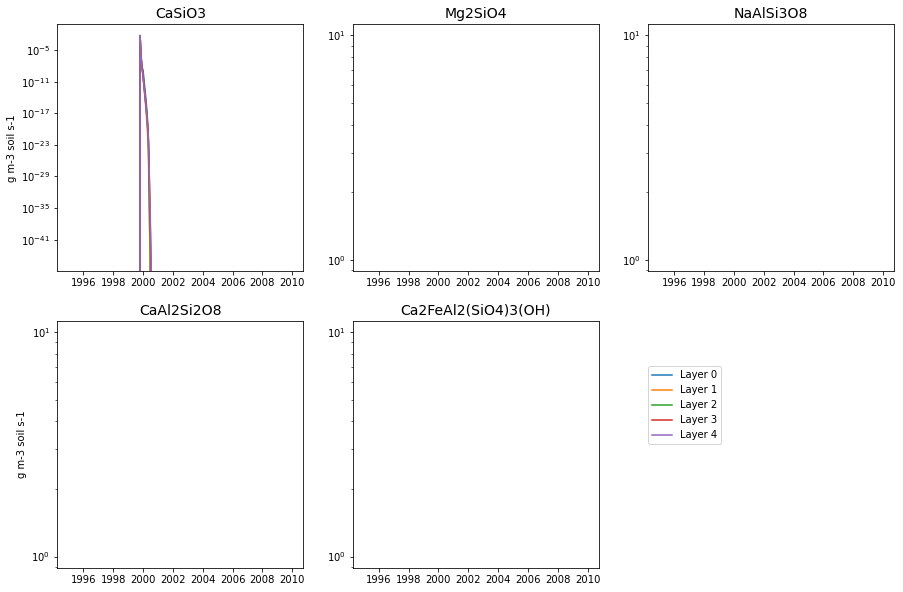

In [7]:
fig, axes = plt.subplots(2, 3, figsize = (15, 10))
for i, min in enumerate(['CaSiO3', 'Mg2SiO4', 'NaAlSi3O8', 'CaAl2Si2O8', 'Ca2FeAl2(SiO4)3(OH)']):
    ax = axes.flat[i]
    for layer in range(5):
        ax.plot(tvec, hr[f'primary_dissolve_vr_{i+1}'][:, layer, 0], label = f'Layer {layer}')
    if i == 4:
        ax.legend(loc = (1.2,0.5))
    ax.set_title(min)
    if np.mod(i, 3) == 0:
        ax.set_ylabel('g m-3 soil s-1')
    ax.set_yscale('log')
axes.flat[-1].axis('off')

<ipython-input-8-65e839535d17>:11: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  ax.set_yscale('log')


(0.0, 1.0, 0.0, 1.0)

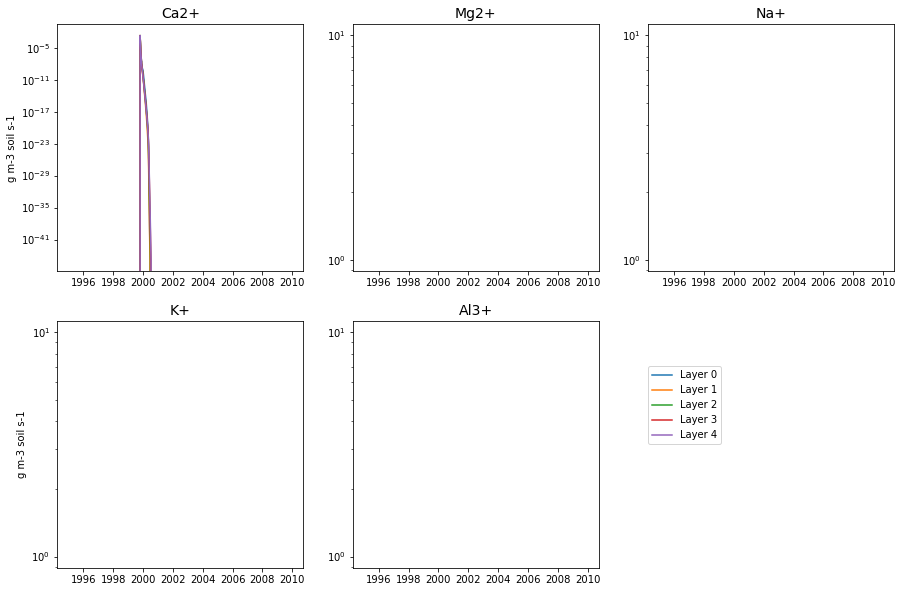

In [8]:
fig, axes = plt.subplots(2, 3, figsize = (15, 10))
for i, min in enumerate(['Ca2+', 'Mg2+', 'Na+', 'K+', 'Al3+']):
    ax = axes.flat[i]
    for layer in range(5):
        ax.plot(tvec, hr[f'primary_cation_flux_vr_{i+1}'][:, layer, 0], label = f'Layer {layer}')
    if i == 4:
        ax.legend(loc = (1.2,0.5))
    ax.set_title(min)
    if np.mod(i, 3) == 0:
        ax.set_ylabel('g m-3 soil s-1')
    ax.set_yscale('log')
axes.flat[-1].axis('off')

## 5. Rate of secondary mineral formation

<ipython-input-9-bcbbea8c7617>:11: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  ax.set_yscale('log')


(0.0, 1.0, 0.0, 1.0)

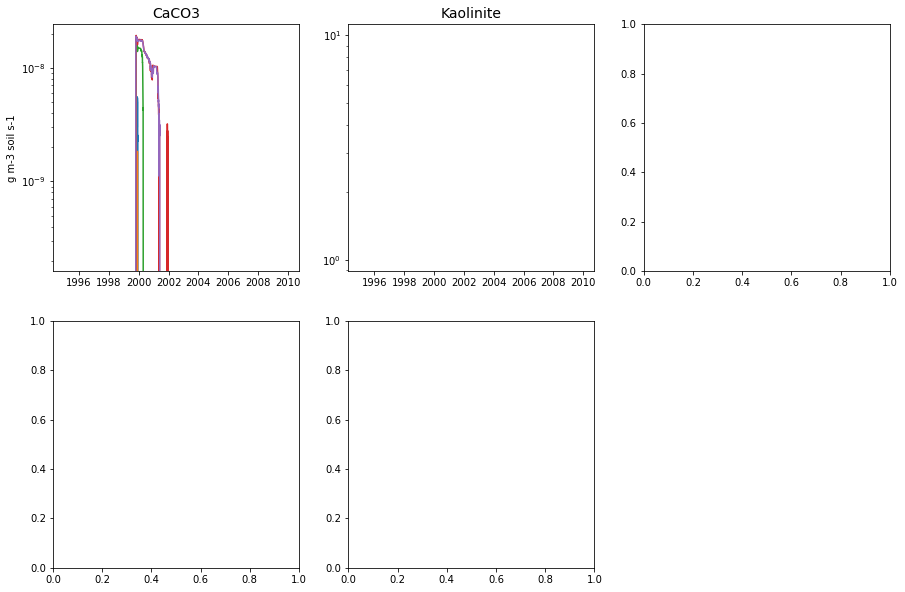

In [9]:
fig, axes = plt.subplots(2, 3, figsize = (15, 10))
for i, minsec in enumerate(['CaCO3', 'Kaolinite']):
    ax = axes.flat[i]
    for layer in range(5):
        ax.plot(tvec, hr[f'r_precip_vr_{i+1}'][:, layer, 0], label = f'Layer {layer}')
    if i == 4:
        ax.legend(loc = (1.2,0.5))
    ax.set_title(minsec)
    if np.mod(i, 3) == 0:
        ax.set_ylabel('g m-3 soil s-1')
    ax.set_yscale('log')
axes.flat[-1].axis('off')

<ipython-input-10-aa4dad08fa2a>:11: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  ax.set_yscale('log')


(0.0, 1.0, 0.0, 1.0)

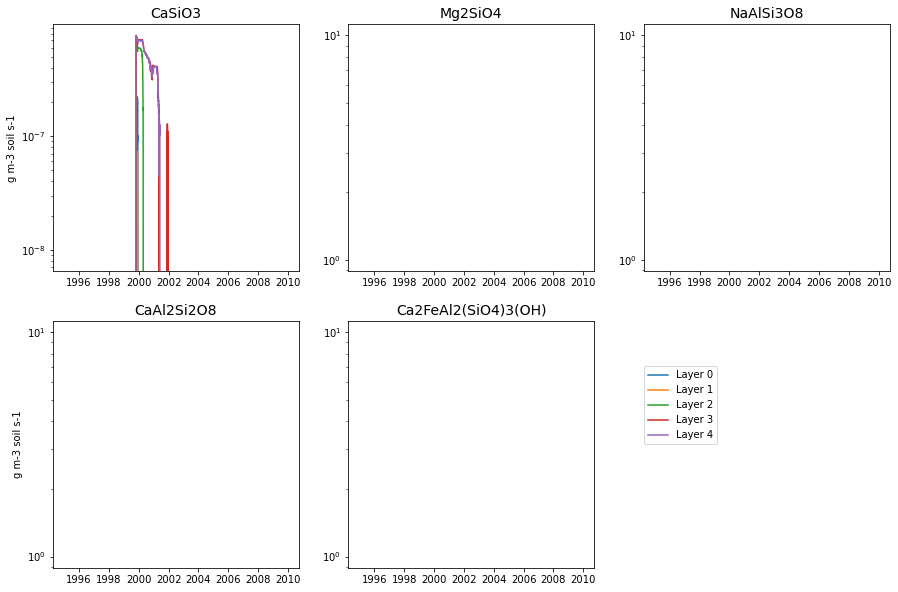

In [10]:
fig, axes = plt.subplots(2, 3, figsize = (15, 10))
for i, min in enumerate(['CaSiO3', 'Mg2SiO4', 'NaAlSi3O8', 'CaAl2Si2O8', 'Ca2FeAl2(SiO4)3(OH)']):
    ax = axes.flat[i]
    for layer in range(5):
        ax.plot(tvec, hr[f'secondary_cation_flux_vr_{i+1}'][:, layer, 0], label = f'Layer {layer}')
    if i == 4:
        ax.legend(loc = (1.2,0.5))
    ax.set_title(min)
    if np.mod(i, 3) == 0:
        ax.set_ylabel('g m-3 soil s-1')
    ax.set_yscale('log')
axes.flat[-1].axis('off')

## 6. Primary mineral content

(0.0, 1.0, 0.0, 1.0)

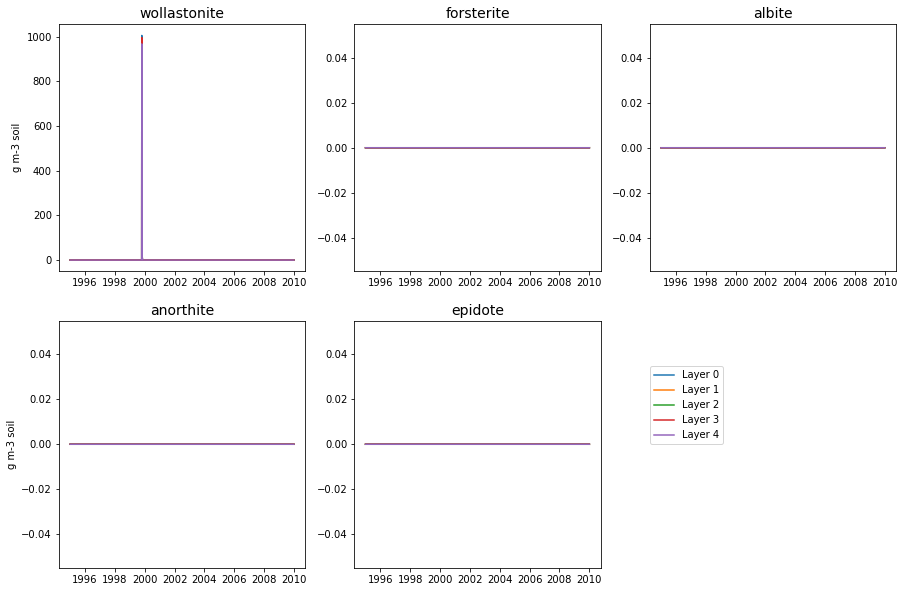

In [11]:
fig, axes = plt.subplots(2, 3, figsize = (15, 10))
for i, cation in enumerate(['wollastonite', 'forsterite', 'albite', 'anorthite', 'epidote']):
    ax = axes.flat[i]
    for layer in range(5):
        ax.plot(tvec, hr[f'primary_mineral_vr_{i+1}'][:, layer, 0], label = f'Layer {layer}')
    if i == 4:
        ax.legend(loc = (1.2,0.5))
    ax.set_title(cation)
    if np.mod(i, 3) == 0:
        ax.set_ylabel('g m-3 soil')
axes.flat[-1].axis('off')

## 7. Cation exchange

Text(0.5, 1.0, 'H+')

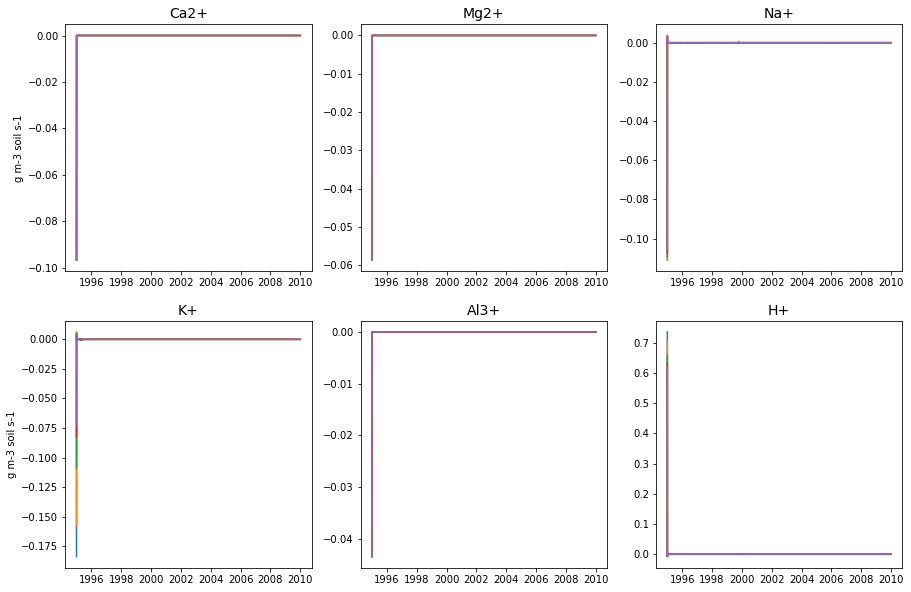

In [12]:
fig, axes = plt.subplots(2, 3, figsize = (15, 10))
for i, cation in enumerate(['Ca2+', 'Mg2+', 'Na+', 'K+', 'Al3+']):
    ax = axes.flat[i]
    for layer in range(5):
        ax.plot(tvec, hr[f'cec_cation_flux_vr_{i+1}'][:, layer, 0], label = f'Layer {layer}')
    if i == 4:
        ax.legend(loc = (1.2,0.5))
    ax.set_title(cation)
    if np.mod(i, 3) == 0:
        ax.set_ylabel('g m-3 soil s-1')
ax = axes.flat[-1]
for layer in range(5):
    ax.plot(tvec, hr[f'cec_proton_flux_vr'][:, layer, 0], label = f'Layer {layer}')
ax.set_title('H+')

Text(0.5, 1.0, 'H+')

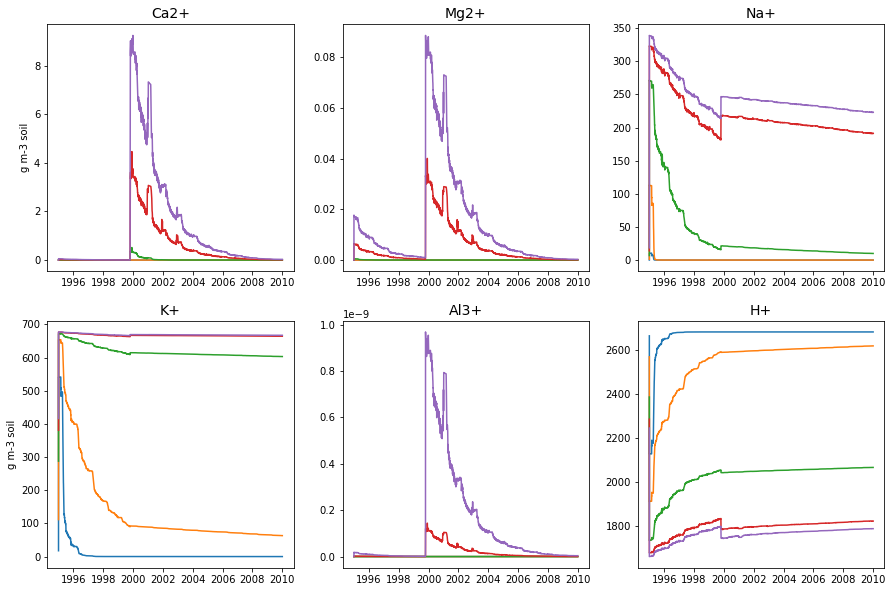

In [13]:
fig, axes = plt.subplots(2, 3, figsize = (15, 10))
for i, cation in enumerate(['Ca2+', 'Mg2+', 'Na+', 'K+', 'Al3+']):
    ax = axes.flat[i]
    for layer in range(5):
        ax.plot(tvec, hr[f'cec_cation_vr_{i+1}'][:, layer, 0], label = f'Layer {layer}')
    if i == 4:
        ax.legend(loc = (1.2,0.5))
    ax.set_title(cation)
    if np.mod(i, 3) == 0:
        ax.set_ylabel('g m-3 soil')
ax = axes.flat[-1]
for layer in range(5):
    ax.plot(tvec, hr[f'cec_proton_vr'][:, layer, 0], label = f'Layer {layer}')
ax.set_title('H+')

(0.0, 1.0, 0.0, 1.0)

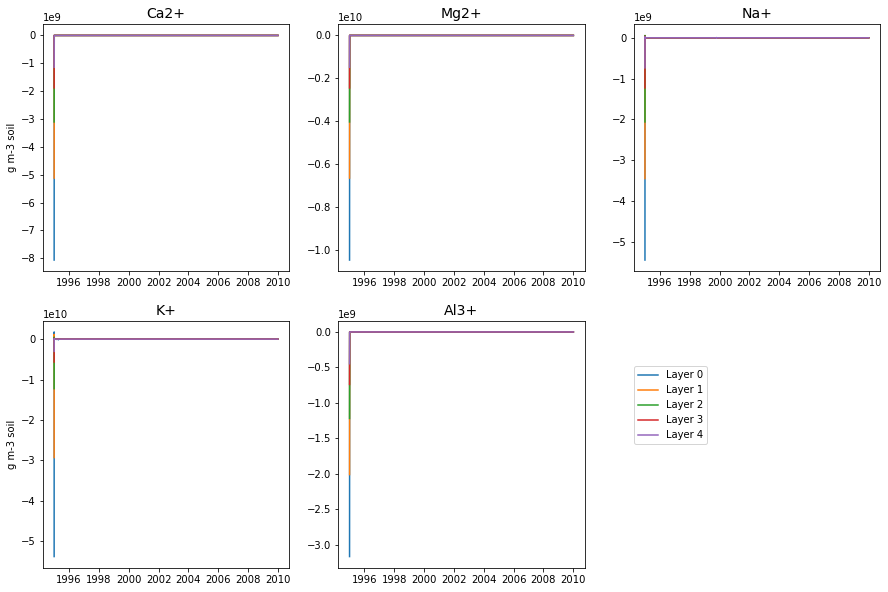

In [14]:
fig, axes = plt.subplots(2, 3, figsize = (15, 10))
for i, cation in enumerate(['Ca2+', 'Mg2+', 'Na+', 'K+', 'Al3+']):
    ax = axes.flat[i]
    for layer in range(5):
        ax.plot(tvec, hr[f'f_cation_soil_vr_{i+1}'][:, layer, 0], label = f'Layer {layer}')
    if i == 4:
        ax.legend(loc = (1.2,0.5))
    ax.set_title(cation)
    if np.mod(i, 3) == 0:
        ax.set_ylabel('g m-3 soil')
    #ax.set_ylim([0, 5e5])
axes.flat[-1].axis('off')

(0.0, 1.0, 0.0, 1.0)

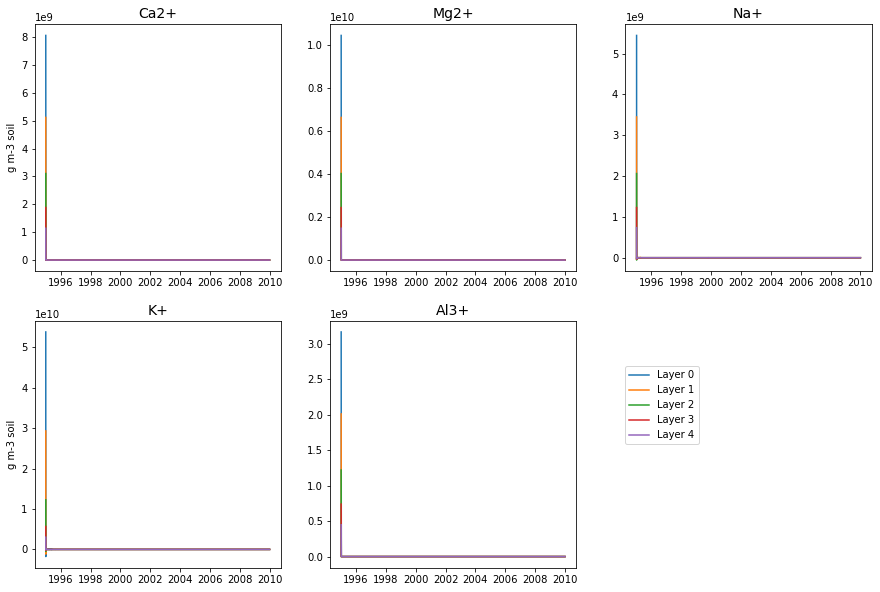

In [15]:
fig, axes = plt.subplots(2, 3, figsize = (15, 10))
for i, cation in enumerate(['Ca2+', 'Mg2+', 'Na+', 'K+', 'Al3+']):
    ax = axes.flat[i]
    for layer in range(5):
        ax.plot(tvec, hr[f'f_cation_water_vr_{i+1}'][:, layer, 0], label = f'Layer {layer}')
    if i == 4:
        ax.legend(loc = (1.2,0.5))
    ax.set_title(cation)
    if np.mod(i, 3) == 0:
        ax.set_ylabel('g m-3 soil')
axes.flat[-1].axis('off')

(0.0, 1.0, 0.0, 1.0)

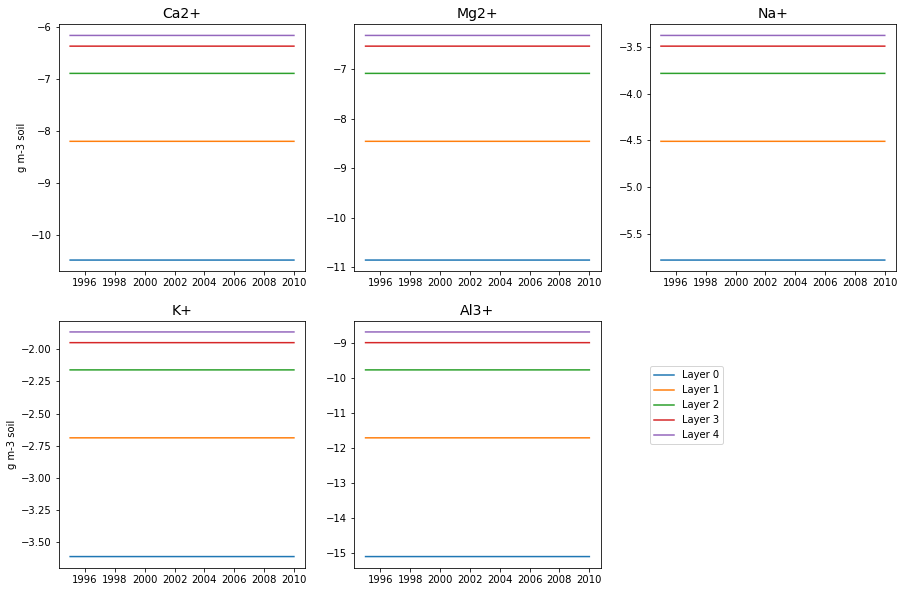

In [16]:
fig, axes = plt.subplots(2, 3, figsize = (15, 10))
for i, cation in enumerate(['Ca2+', 'Mg2+', 'Na+', 'K+', 'Al3+']):
    ax = axes.flat[i]
    for layer in range(5):
        ax.plot(tvec, hr[f'log_km_col_{i+1}'][:, layer, 0], label = f'Layer {layer}')
    if i == 4:
        ax.legend(loc = (1.2,0.5))
    ax.set_title(cation)
    if np.mod(i, 3) == 0:
        ax.set_ylabel('g m-3 soil')
axes.flat[-1].axis('off')

## 8. Omega values

(0.0, 1.0, 0.0, 1.0)

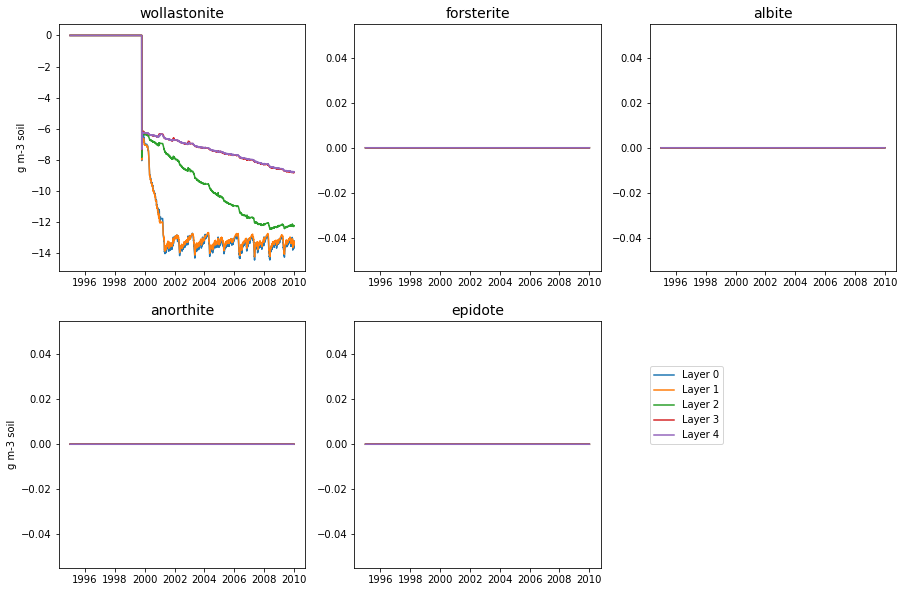

In [17]:
fig, axes = plt.subplots(2, 3, figsize = (15, 10))
for i, cation in enumerate(['wollastonite', 'forsterite', 'albite', 'anorthite', 'epidote']):
    ax = axes.flat[i]
    for layer in range(5):
        ax.plot(tvec, hr[f'log_omega_vr_{i+1}'][:, layer, 0], label = f'Layer {layer}')
    if i == 4:
        ax.legend(loc = (1.2,0.5))
    ax.set_title(cation)
    if np.mod(i, 3) == 0:
        ax.set_ylabel('g m-3 soil')
axes.flat[-1].axis('off')

In [18]:
hr.close()